Predicting whether income exceeds
$50K/yr based on census data by using the dataset (‘Census Income’) has been taken from the UCI Machine
Learning repository (https://archive.ics.uci.edu/dataset/2/adult). This achieved using two machine
learning models based on Naïve Bayes and Random Forest Classification.

Load the dataset

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print("Meta Data\n",adult.metadata)

# variable information
print("Variables\n",adult.variables)

Meta Data
 {'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following condit

Import nessasary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # to balance the income
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN

create dataframe

In [4]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48803,37,Federal-gov,238980,Masters,14,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,42,United-States,<=50K.
33791,24,Private,100961,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K.
31910,43,Private,198330,Masters,14,Widowed,Prof-specialty,Unmarried,Black,Female,0,0,37,United-States,<=50K
6484,54,Federal-gov,51048,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
2438,20,Private,100188,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,24,United-States,<=50K


In [8]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


Returns a tuple representing the number of rows and columns in the DataFrame

In [9]:
df.shape

(48842, 15)

In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

# Data preprocessing

In [12]:
df['income'].replace({'<=50K.':'<=50K', '>50K.': '>50K'}, inplace = True)
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [13]:
df.replace({'?': np.nan, ' ?': np.nan, '? ': np.nan, ' ? ': np.nan}, inplace = True)

In [14]:
print("Missing Values ")
df.isna().sum()

Missing Values 


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [15]:
# replacing NaN values with the mode of respective columns
for column in df.columns:
  mode_value = df[column].mode()[0]
  df[column].fillna(mode_value, inplace = True)

print("Missing Values after replacing NaN values with the mode")
print (df.isnull().sum())

Missing Values after replacing NaN values with the mode
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [16]:
# find duplicate values in the dataset
print (df[df.duplicated()])

       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  3677

In [17]:
df.shape

(48842, 15)

In [18]:
# drop duplicates
df = df.drop_duplicates()

# find duplicate values in the dataset
print (df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [19]:
df.shape

(48789, 15)

In [20]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Visualize distribution of target variable (Income)

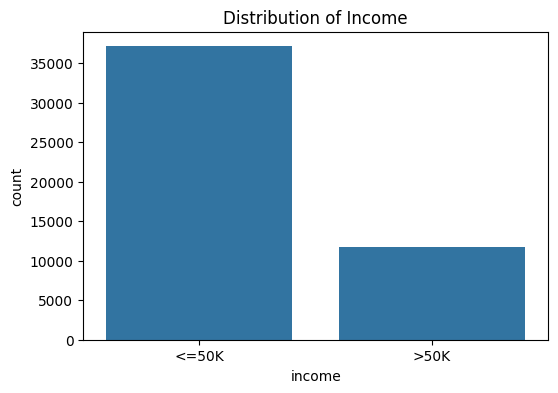

In [21]:
# Visualize distribution of target variable (Income)
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

Visualize distribution of numerical features

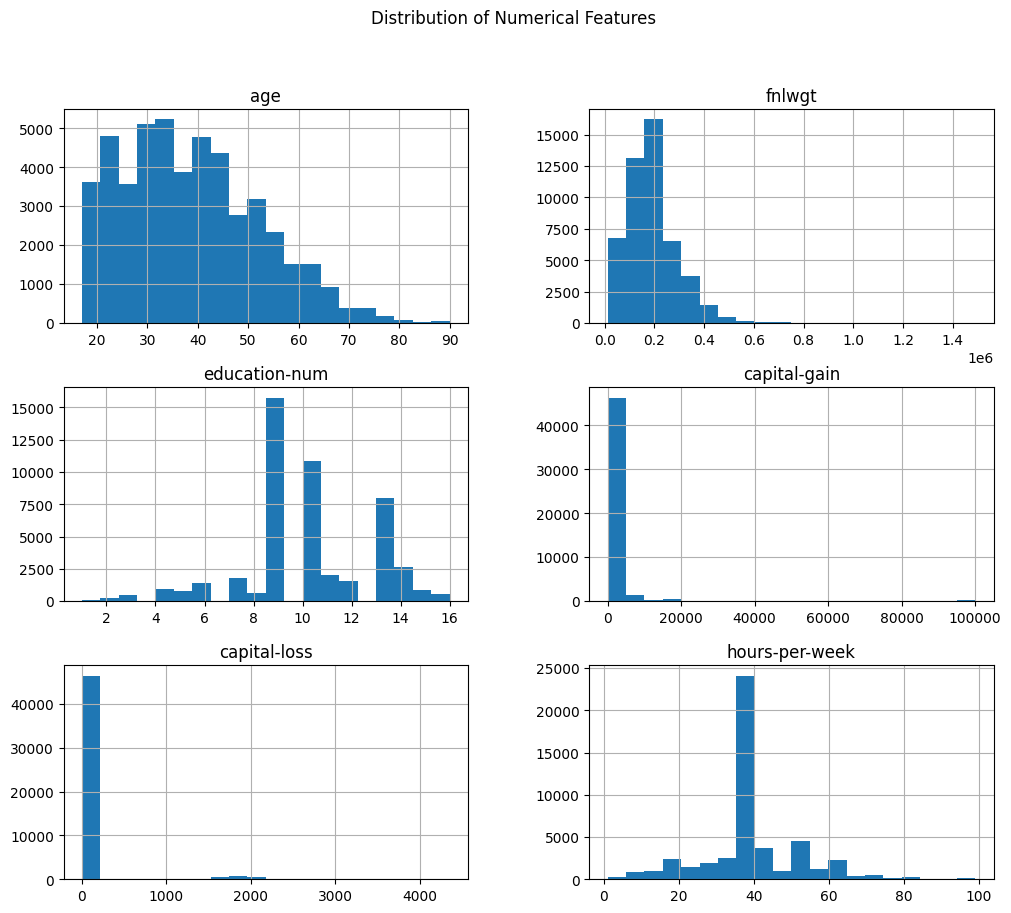

In [22]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

Visualizing relationship between numerical features and target (Income)

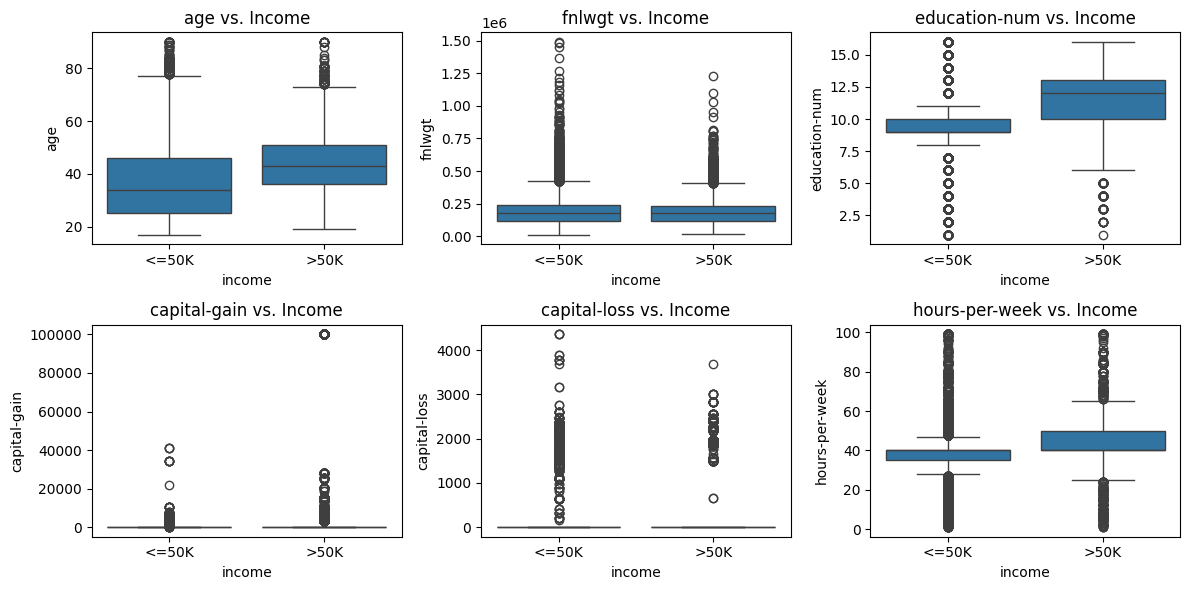

In [23]:
plt.figure(figsize=(12, 6))
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='income', y=feature, data=df)
    plt.title(f'{feature} vs. Income')
plt.tight_layout()
plt.show()

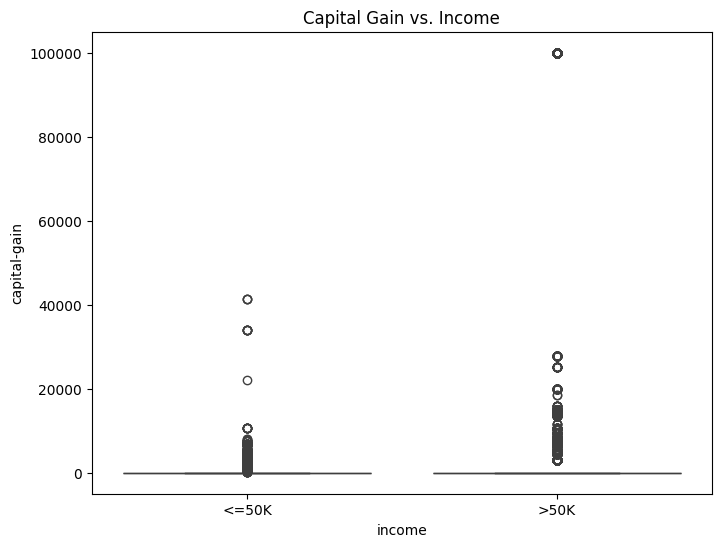

In [24]:
# Create box plot for capital-gain grouped by income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='capital-gain', data=df)
plt.title('Capital Gain vs. Income')
plt.show()

Handle outlier of the capital-gain

Outliers can significantly impact the performance of machine learning models, skewing results and reducing accuracy. Here's the method i used to handle outliers in capital gain column

In [25]:
# Handle outlier of the capital-gain
print("Before Clipping:")
print(df['capital-gain'].describe())

# Define lower and upper bounds for clipping
lower_bound = df['capital-gain'].quantile(0.5)
upper_bound = df['capital-gain'].quantile(0.97)

# Clip the values of 'capital-gain' column
df['capital-gain'] = df['capital-gain'].clip(lower=lower_bound, upper=upper_bound)

# Verify the changes
print("\nAfter Clipping:")
print(df['capital-gain'].describe())

Before Clipping:
count    48789.000000
mean      1080.239829
std       7455.980728
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

After Clipping:
count    48789.000000
mean       464.402734
std       1679.685698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7688.000000
Name: capital-gain, dtype: float64


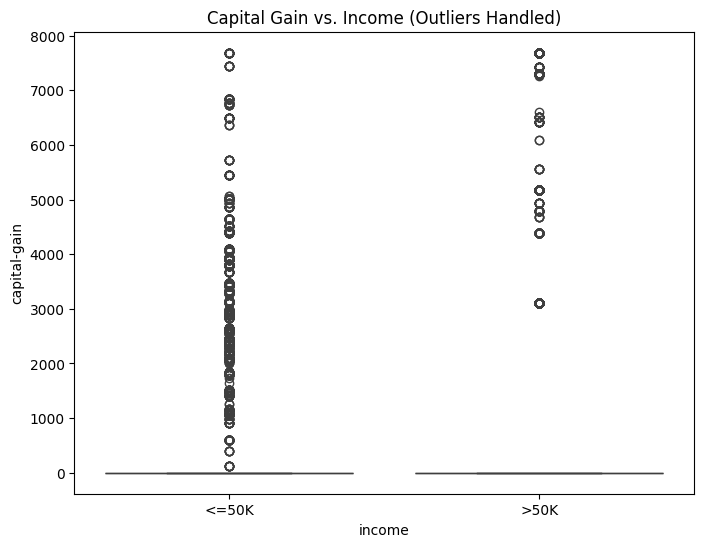

In [26]:
# Create box plot for capital-gain grouped by income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='capital-gain', data=df)
plt.title('Capital Gain vs. Income (Outliers Handled)')
plt.show()

Visualize relationship between categorical features and target

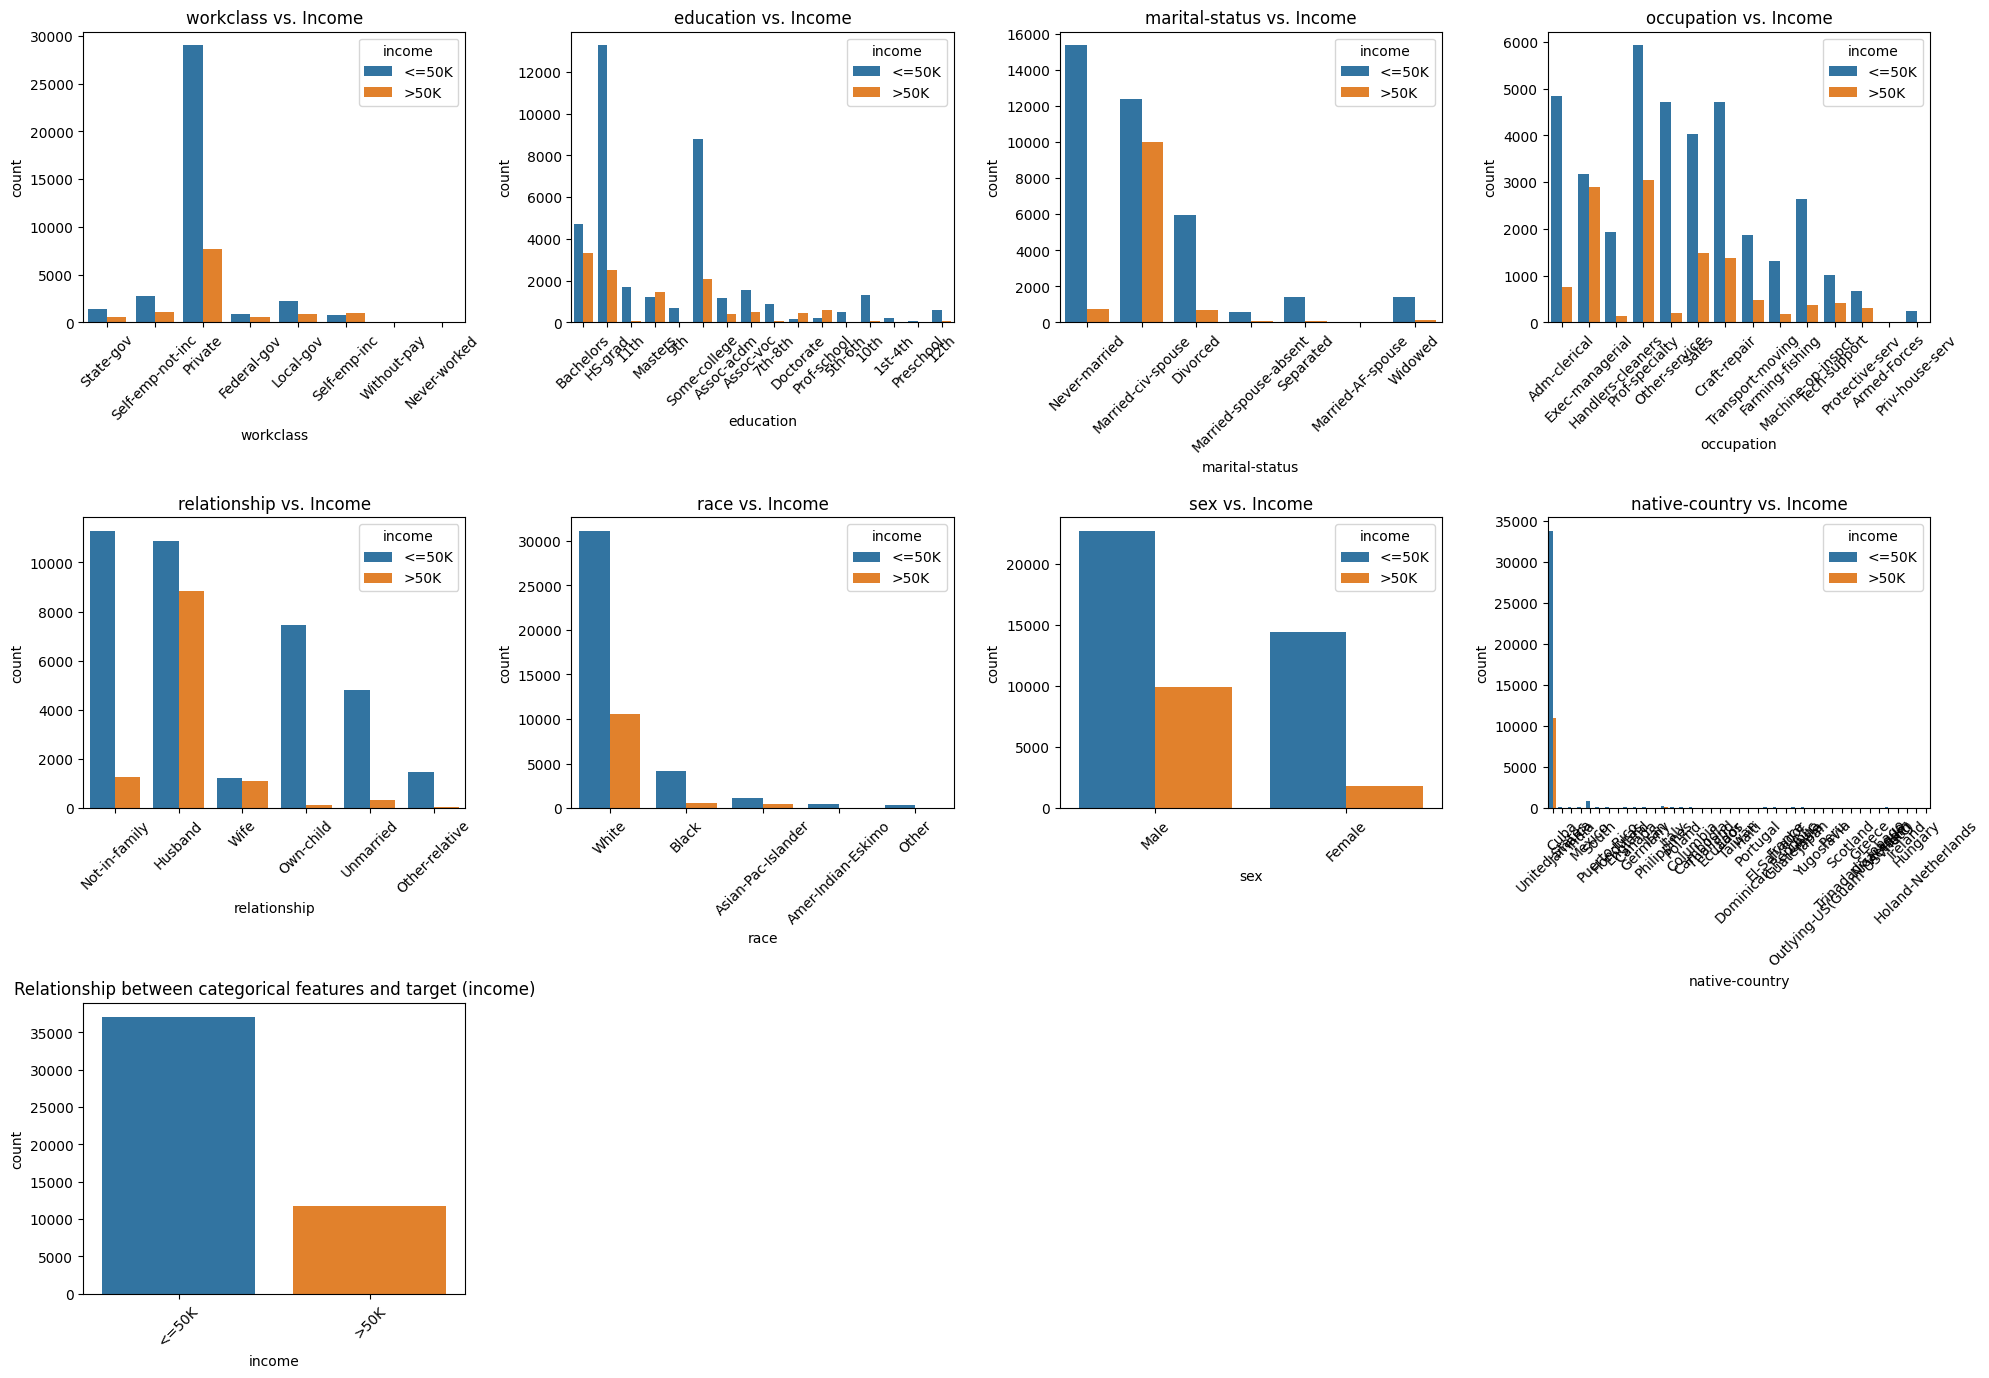

In [27]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(df.select_dtypes(include=['object']).columns.tolist()):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='income', data=df)
    plt.title(f'{feature} vs. Income')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Relationship between categorical features and target (income)')
plt.show()

In [28]:
print (df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


Dropping Unnessasary columns

In [29]:
df.drop(columns=['fnlwgt', 'education'], inplace=True)

update the value of numeric_features. cuz fnlwgt was removed from the datset

In [30]:
df.shape

(48789, 13)

In [31]:
# find duplicate values in the dataset
print (df[df.duplicated()])

       age workclass  education-num      marital-status         occupation  \
352     33   Private             13  Married-civ-spouse    Exec-managerial   
391     27   Private             13       Never-married       Craft-repair   
563     24   Private              9       Never-married  Handlers-cleaners   
570     24   Private              9       Never-married       Craft-repair   
673     33   Private             13  Married-civ-spouse    Exec-managerial   
...    ...       ...            ...                 ...                ...   
48830   32   Private              9  Married-civ-spouse  Handlers-cleaners   
48833   31   Private              9  Married-civ-spouse       Craft-repair   
48834   25   Private              9       Never-married      Other-service   
48836   33   Private             13       Never-married     Prof-specialty   
48839   38   Private             13  Married-civ-spouse     Prof-specialty   

        relationship   race     sex  capital-gain  capital-loss

In [32]:
# drop duplicates
df = df.drop_duplicates()

# find duplicate values in the dataset
print (df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [33]:
df.shape

(42204, 13)

### Categorizing - new dataframe
(df_with_categories)

In [34]:
# categorizing
df_with_categories = df.copy()
df_with_categories.drop(columns=['native-country', 'occupation'], inplace=True)

In [35]:
df['native-country'].value_counts()

United-States                 38081
Mexico                          927
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         105
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [36]:
# Define mapping for broader country categories
country_mapping = {
    'United-States': 'North America',
    'Mexico': 'North America',
    'Canada': 'North America',
    'Puerto-Rico': 'North America',
    'El-Salvador': 'North America',
    'Dominican-Republic': 'North America',
    'Jamaica': 'North America',
    'Cuba': 'North America',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Philippines': 'Asia',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Vietnam': 'Asia',
    'Taiwan': 'Asia',
    'Iran': 'Asia',
    'Thailand': 'Asia',
    'Hong': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Germany': 'Europe',
    'England': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Greece': 'Europe',
    'Portugal': 'Europe',
    'France': 'Europe',
    'Ireland': 'Europe',
    'Scotland': 'Europe',
    'Hungary': 'Europe',
    'Yugoslavia': 'Europe',
    'South': 'Latin America & Caribbean',
    'Columbia': 'Latin America & Caribbean',
    'Haiti': 'Latin America & Caribbean',
    'Peru': 'Latin America & Caribbean',
    'Ecuador': 'Latin America & Caribbean',
    'Trinadad&Tobago': 'Latin America & Caribbean',
    'Nicaragua': 'Latin America & Caribbean',
    'Outlying-US(Guam-USVI-etc)': 'Others',
    'Holand-Netherlands': 'Others',
}

# Replace specific country names with broader category names
df_with_categories['country-category'] = df['native-country'].replace(country_mapping)

# Verify the changes
print(df_with_categories['country-category'].value_counts())

North America                39981
Asia                           979
Europe                         778
Latin America & Caribbean      442
Others                          24
Name: country-category, dtype: int64


In [37]:
df['occupation'].value_counts()

Prof-specialty       7944
Exec-managerial      5383
Adm-clerical         4799
Sales                4757
Craft-repair         4707
Other-service        4348
Machine-op-inspct    2485
Transport-moving     2069
Handlers-cleaners    1730
Farming-fishing      1434
Tech-support         1349
Protective-serv       944
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [38]:
# Define mapping for broader occupation categories
occupation_mapping = {
    'Prof-specialty': 'White-Collar Jobs',
    'Exec-managerial': 'White-Collar Jobs',
    'Adm-clerical': 'White-Collar Jobs',
    'Tech-support': 'White-Collar Jobs',
    'Craft-repair': 'Blue-Collar Jobs',
    'Machine-op-inspct': 'Blue-Collar Jobs',
    'Transport-moving': 'Blue-Collar Jobs',
    'Handlers-cleaners': 'Blue-Collar Jobs',
    'Sales': 'Sales & Service Jobs',
    'Other-service': 'Sales & Service Jobs',
    'Protective-serv': 'Protective & Security Jobs',
    'Priv-house-serv': 'Protective & Security Jobs',
    'Armed-Forces': 'Protective & Security Jobs',
    'Farming-fishing': 'Farming & Fishing Jobs'
}

# Replace specific occupation names with broader category names
df_with_categories['occupation-category'] = df['occupation'].replace(occupation_mapping)

# Verify the changes
print(df_with_categories['occupation-category'].value_counts())

White-Collar Jobs             19475
Blue-Collar Jobs              10991
Sales & Service Jobs           9105
Farming & Fishing Jobs         1434
Protective & Security Jobs     1199
Name: occupation-category, dtype: int64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             42204 non-null  int64 
 1   workclass       42204 non-null  object
 2   education-num   42204 non-null  int64 
 3   marital-status  42204 non-null  object
 4   occupation      42204 non-null  object
 5   relationship    42204 non-null  object
 6   race            42204 non-null  object
 7   sex             42204 non-null  object
 8   capital-gain    42204 non-null  int64 
 9   capital-loss    42204 non-null  int64 
 10  hours-per-week  42204 non-null  int64 
 11  native-country  42204 non-null  object
 12  income          42204 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [40]:
df.shape

(42204, 13)

In [41]:
df['marital-status'].value_counts()

Married-civ-spouse       19082
Never-married            13240
Divorced                  6209
Separated                 1511
Widowed                   1498
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [42]:
# Mapping dictionary for categorizing marital status
marital_status_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Never-married': 'Never-married',
    'Widowed': 'Widowed',
    'Divorced': 'Divorced',
    'Separated': 'Divorced'  # Considering 'Separated' as 'Divorced'
}

# Replace marital status with categorized values
df_with_categories['marital-status'] = df['marital-status'].replace(marital_status_mapping)

# Check the updated counts
print(df_with_categories['marital-status'].value_counts())

Married          19746
Never-married    13240
Divorced          7720
Widowed           1498
Name: marital-status, dtype: int64


In [43]:
df_with_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  42204 non-null  int64 
 1   workclass            42204 non-null  object
 2   education-num        42204 non-null  int64 
 3   marital-status       42204 non-null  object
 4   relationship         42204 non-null  object
 5   race                 42204 non-null  object
 6   sex                  42204 non-null  object
 7   capital-gain         42204 non-null  int64 
 8   capital-loss         42204 non-null  int64 
 9   hours-per-week       42204 non-null  int64 
 10  income               42204 non-null  object
 11  country-category     42204 non-null  object
 12  occupation-category  42204 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [44]:
df_with_categories.shape

(42204, 13)

In [45]:
# drop duplicates
df_with_categories = df_with_categories.drop_duplicates()

# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

Empty DataFrame
Columns: [age, workclass, education-num, marital-status, relationship, race, sex, capital-gain, capital-loss, hours-per-week, income, country-category, occupation-category]
Index: []


In [46]:
df_with_categories.shape

(38081, 13)

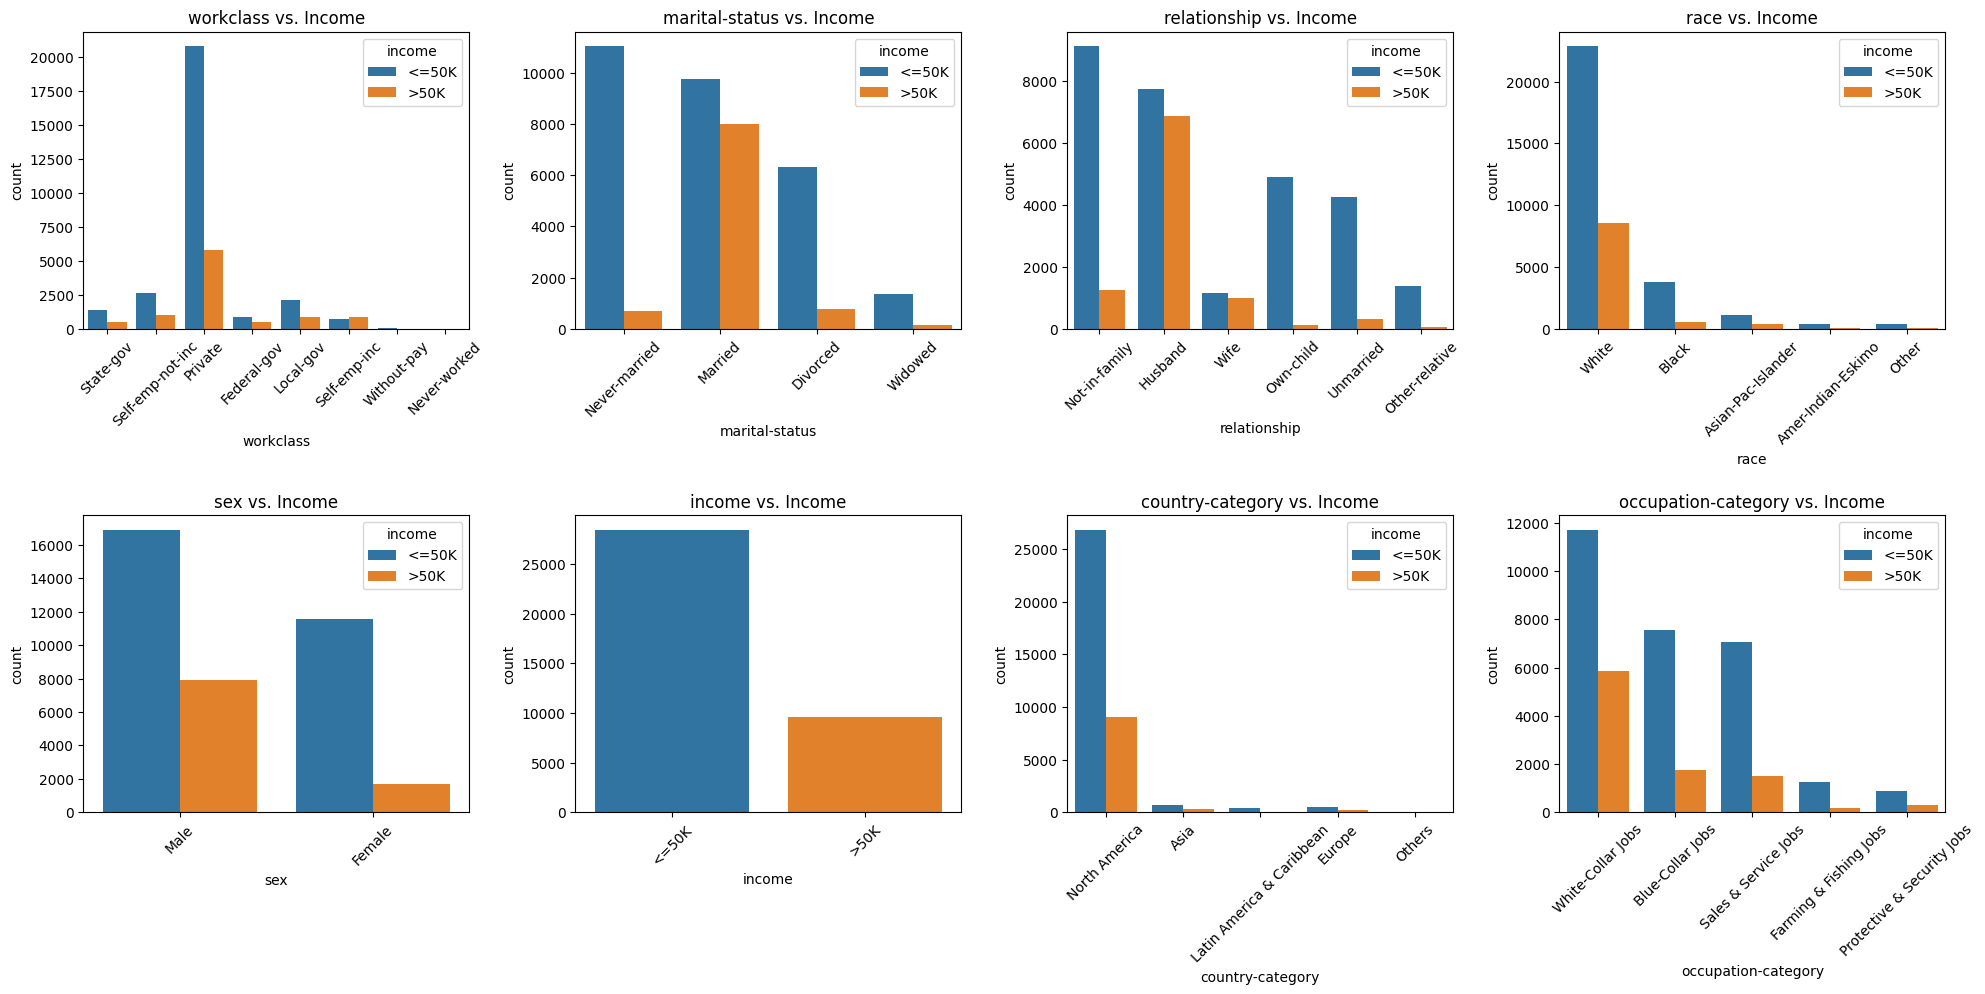

In [47]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(df_with_categories.select_dtypes(include=['object']).columns.tolist()):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='income', data=df_with_categories)
    plt.title(f'{feature} vs. Income')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

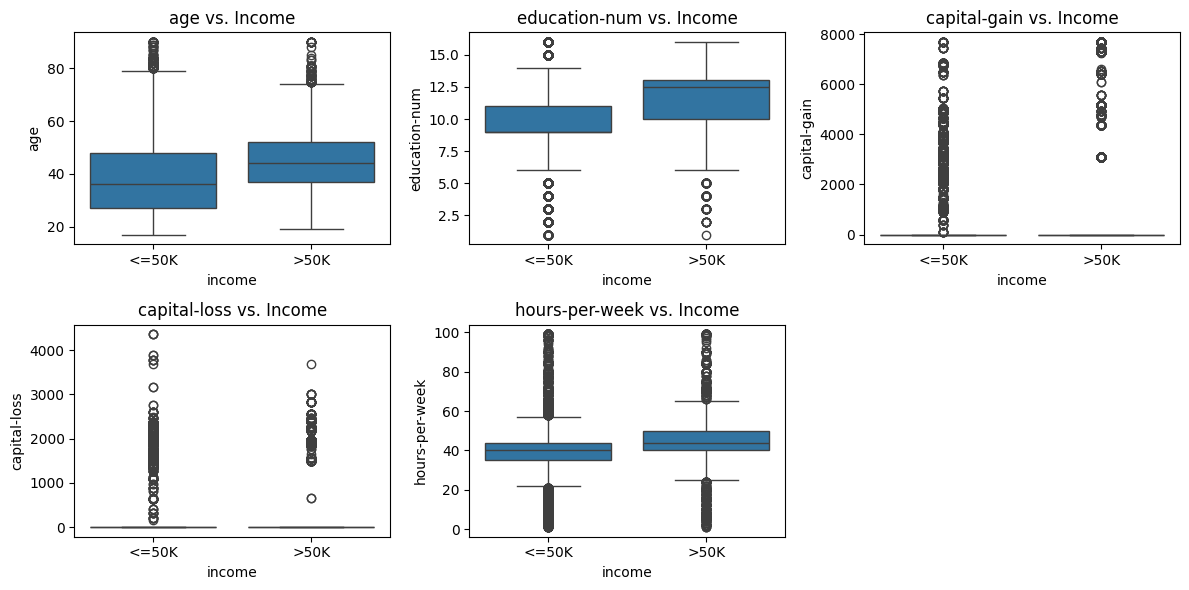

In [48]:
plt.figure(figsize=(12, 6))
numeric_features = df_with_categories.select_dtypes(include=[np.number]).columns.tolist()
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='income', y=feature, data=df_with_categories)
    plt.title(f'{feature} vs. Income')
plt.tight_layout()
plt.show()

In [49]:
# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

Empty DataFrame
Columns: [age, workclass, education-num, marital-status, relationship, race, sex, capital-gain, capital-loss, hours-per-week, income, country-category, occupation-category]
Index: []


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             42204 non-null  int64 
 1   workclass       42204 non-null  object
 2   education-num   42204 non-null  int64 
 3   marital-status  42204 non-null  object
 4   occupation      42204 non-null  object
 5   relationship    42204 non-null  object
 6   race            42204 non-null  object
 7   sex             42204 non-null  object
 8   capital-gain    42204 non-null  int64 
 9   capital-loss    42204 non-null  int64 
 10  hours-per-week  42204 non-null  int64 
 11  native-country  42204 non-null  object
 12  income          42204 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [51]:
df_with_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38081 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  38081 non-null  int64 
 1   workclass            38081 non-null  object
 2   education-num        38081 non-null  int64 
 3   marital-status       38081 non-null  object
 4   relationship         38081 non-null  object
 5   race                 38081 non-null  object
 6   sex                  38081 non-null  object
 7   capital-gain         38081 non-null  int64 
 8   capital-loss         38081 non-null  int64 
 9   hours-per-week       38081 non-null  int64 
 10  income               38081 non-null  object
 11  country-category     38081 non-null  object
 12  occupation-category  38081 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.1+ MB


In [52]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
df_with_categories.head()

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,country-category,occupation-category
0,39,State-gov,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K,North America,White-Collar Jobs
1,50,Self-emp-not-inc,13,Married,Husband,White,Male,0,0,13,<=50K,North America,White-Collar Jobs
2,38,Private,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K,North America,Blue-Collar Jobs
3,53,Private,7,Married,Husband,Black,Male,0,0,40,<=50K,North America,Blue-Collar Jobs
4,28,Private,13,Married,Wife,Black,Female,0,0,40,<=50K,North America,White-Collar Jobs


# Feature Engineering

## Normalize (Scale) the Numerical Data for both dataframes

To ensure numerical features have a similar scale, preventing bias towards features with larger ranges.

In [54]:
# Normalize (Scale) the Numerical Data for both dataframes
scaler = StandardScaler()

# Apply scaling to numerical features in both DataFrames
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df[numerical_features] = scaler.fit_transform(df[numerical_features])
df_with_categories[numerical_features] = scaler.fit_transform(df_with_categories[numerical_features])

In [55]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.037032,State-gov,1.093692,Never-married,Adm-clerical,Not-in-family,White,Male,0.930571,-0.233502,-0.051285,United-States,<=50K
1,0.761285,Self-emp-not-inc,1.093692,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.295782,-0.233502,-2.146279,United-States,<=50K
2,-0.109606,Private,-0.409648,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.295782,-0.233502,-0.051285,United-States,<=50K
3,0.979008,Private,-1.161318,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.295782,-0.233502,-0.051285,United-States,<=50K
4,-0.835349,Private,1.093692,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.295782,-0.233502,-0.051285,Cuba,<=50K


In [56]:
df_with_categories.head()

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,country-category,occupation-category
0,-0.071604,State-gov,1.062029,Never-married,Not-in-family,White,Male,0.873090,-0.245533,-0.056683,<=50K,North America,White-Collar Jobs
1,0.720133,Self-emp-not-inc,1.062029,Married,Husband,White,Male,-0.309687,-0.245533,-2.080265,<=50K,North America,White-Collar Jobs
2,-0.143580,Private,-0.411389,Divorced,Not-in-family,White,Male,-0.309687,-0.245533,-0.056683,<=50K,North America,Blue-Collar Jobs
3,0.936062,Private,-1.148099,Married,Husband,Black,Male,-0.309687,-0.245533,-0.056683,<=50K,North America,Blue-Collar Jobs
4,-0.863341,Private,1.062029,Married,Wife,Black,Female,-0.309687,-0.245533,-0.056683,<=50K,North America,White-Collar Jobs


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             42204 non-null  float64
 1   workclass       42204 non-null  object 
 2   education-num   42204 non-null  float64
 3   marital-status  42204 non-null  object 
 4   occupation      42204 non-null  object 
 5   relationship    42204 non-null  object 
 6   race            42204 non-null  object 
 7   sex             42204 non-null  object 
 8   capital-gain    42204 non-null  float64
 9   capital-loss    42204 non-null  float64
 10  hours-per-week  42204 non-null  float64
 11  native-country  42204 non-null  object 
 12  income          42204 non-null  object 
dtypes: float64(5), object(8)
memory usage: 4.5+ MB


In [58]:
print("Missing Values ")
df.isna().sum()

Missing Values 


age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [59]:
print("Missing Values ")
df_with_categories.isna().sum()

Missing Values 


age                    0
workclass              0
education-num          0
marital-status         0
relationship           0
race                   0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
income                 0
country-category       0
occupation-category    0
dtype: int64

In [60]:
df.shape

(42204, 13)

In [61]:
df_with_categories.shape

(38081, 13)

### Label Encoding for Categorical Features

To convert categorical features into numerical representations for model compatibility.

In [62]:
# Label Encoding for Categorical Features in both dataframes
le = LabelEncoder()

# Apply encoding to categorical features in both DataFrames
categorical_features1 = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_features2 = ['workclass', 'marital-status', 'occupation-category', 'relationship', 'race', 'sex', 'country-category']

for feature in categorical_features1:
    df[feature] = le.fit_transform(df[feature])
for feature in categorical_features2:
    df_with_categories[feature] = le.fit_transform(df_with_categories[feature])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             42204 non-null  float64
 1   workclass       42204 non-null  int64  
 2   education-num   42204 non-null  float64
 3   marital-status  42204 non-null  int64  
 4   occupation      42204 non-null  int64  
 5   relationship    42204 non-null  int64  
 6   race            42204 non-null  int64  
 7   sex             42204 non-null  int64  
 8   capital-gain    42204 non-null  float64
 9   capital-loss    42204 non-null  float64
 10  hours-per-week  42204 non-null  float64
 11  native-country  42204 non-null  int64  
 12  income          42204 non-null  object 
dtypes: float64(5), int64(7), object(1)
memory usage: 4.5+ MB


The income column shouldn't be an object type for machine learning modeling. In income prediction, we typically want the income to be a numerical value (e.g., integer or float) representing the annual income. Here's why:

**Model Compatibility:** Most machine learning models for classification tasks expect numerical features and target variables. Representing income as an object type (text) makes it incompatible with these models.


**Loss of Information:** By keeping income as text (e.g., "<=50K" or ">50K"), the model loses valuable information about the actual income amount. It can only learn the relationship between categories, not the specific income values.

In [64]:
# Create a new binary target variable (0 for <=50K, 1 for >50K)
df['income-binary'] = df['income'].map({'<=50K': 0, '>50K': 1})
df_with_categories['income-binary'] = df_with_categories['income'].map({'<=50K': 0, '>50K': 1})

df.drop(columns=['income'], inplace=True)
df_with_categories.drop(columns=['income'], inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             42204 non-null  float64
 1   workclass       42204 non-null  int64  
 2   education-num   42204 non-null  float64
 3   marital-status  42204 non-null  int64  
 4   occupation      42204 non-null  int64  
 5   relationship    42204 non-null  int64  
 6   race            42204 non-null  int64  
 7   sex             42204 non-null  int64  
 8   capital-gain    42204 non-null  float64
 9   capital-loss    42204 non-null  float64
 10  hours-per-week  42204 non-null  float64
 11  native-country  42204 non-null  int64  
 12  income-binary   42204 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 4.5 MB


In [66]:
df_with_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38081 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38081 non-null  float64
 1   workclass            38081 non-null  int64  
 2   education-num        38081 non-null  float64
 3   marital-status       38081 non-null  int64  
 4   relationship         38081 non-null  int64  
 5   race                 38081 non-null  int64  
 6   sex                  38081 non-null  int64  
 7   capital-gain         38081 non-null  float64
 8   capital-loss         38081 non-null  float64
 9   hours-per-week       38081 non-null  float64
 10  country-category     38081 non-null  int64  
 11  occupation-category  38081 non-null  int64  
 12  income-binary        38081 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 4.1 MB


<Axes: >

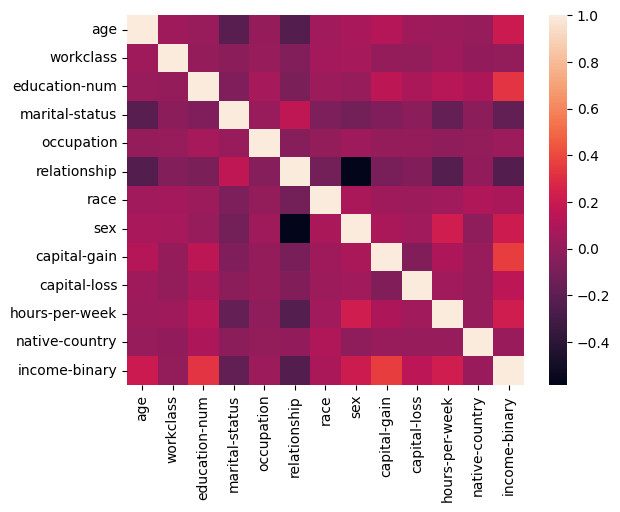

In [67]:
sns.heatmap(df.corr())

<Axes: >

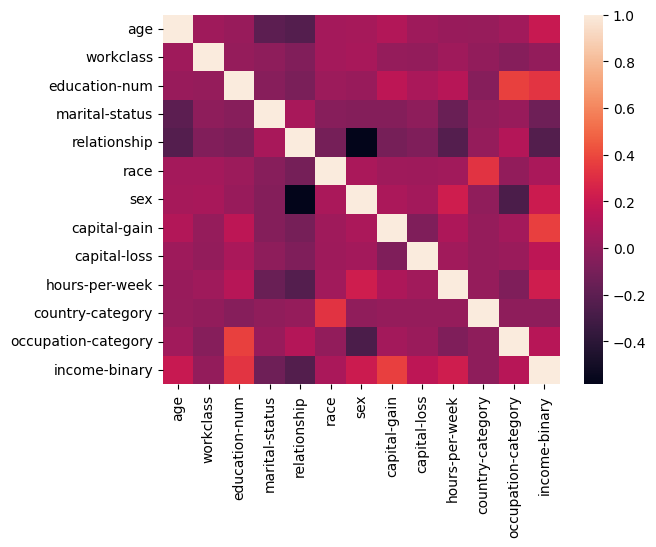

In [68]:
sns.heatmap(df_with_categories.corr())

In [69]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-binary
0,-0.037032,6,1.093692,4,0,1,4,1,0.930571,-0.233502,-0.051285,38,0
1,0.761285,5,1.093692,2,3,0,4,1,-0.295782,-0.233502,-2.146279,38,0
2,-0.109606,3,-0.409648,0,5,1,4,1,-0.295782,-0.233502,-0.051285,38,0
3,0.979008,3,-1.161318,2,5,0,2,1,-0.295782,-0.233502,-0.051285,38,0
4,-0.835349,3,1.093692,2,9,5,2,0,-0.295782,-0.233502,-0.051285,4,0


Check whether the income (target) is balance or not

In [70]:
# Check class distribution for df
income_counts = df['income-binary'].value_counts()
print(income_counts)

0    31838
1    10366
Name: income-binary, dtype: int64


In [71]:
# Check class distribution for df_with_categories
income_counts_categories = df_with_categories['income-binary'].value_counts()
print(income_counts_categories)

0    28493
1     9588
Name: income-binary, dtype: int64


In [72]:
df.shape

(42204, 13)

In [73]:
df_with_categories.shape

(38081, 13)

# Handle Imbalance ‘income’ column

Both df and df_with_categories  seem to be imbalanced datasets.

Oversampling might introduce bias with duplicated data, while undersampling discards information. SMOTE offers a balance.

Consider the trade-offs between complexity and effectiveness. SMOTE might be slightly more complex to implement compared to oversampling but can be more effective.

In [74]:
# Handle Imbalance ‘income’ column
smote = SMOTE()

# Apply SMOTE to both DataFrames
df, df['income-binary'] = smote.fit_resample(df, df['income-binary'])
df_with_categories, df_with_categories['income-binary'] = smote.fit_resample(df_with_categories, df_with_categories['income-binary'])

SMOTE: This technique creates synthetic data points for the minority class based on existing data points, increasing its representation without simply copying existing samples

In [75]:
df.shape

(63676, 13)

In [76]:
df_with_categories.shape

(56986, 13)

In [77]:
df['income-binary'].value_counts()

0    31838
1    31838
Name: income-binary, dtype: int64

In [78]:
df_with_categories['income-binary'].value_counts()

0    28493
1    28493
Name: income-binary, dtype: int64

In [79]:
df['age'].value_counts()

-0.472477    1225
-0.254755    1223
-0.399903    1185
-0.182180    1184
-0.327329    1181
             ... 
 0.837705       1
-0.292906       1
 1.056089       1
 2.567313       1
-0.568597       1
Name: age, Length: 20063, dtype: int64

In [80]:
df['education-num'].value_counts()

-0.409648    15699
-0.033813    11293
 1.093692    10936
 1.469527     3833
 0.342022     2270
             ...  
 0.954275        1
 2.007879        1
-0.059437        1
 0.777346        1
 1.347593        1
Name: education-num, Length: 9618, dtype: int64

In [81]:
# find duplicate values in the dataset
print (df[df.duplicated()])

            age  workclass  education-num  marital-status  occupation  \
42749 -0.182180          3      -0.033813               2           5   
43124  1.124156          3       1.093692               2           9   
44017 -0.037032          4       0.342022               2           3   
44256 -0.690200          3      -0.033813               2           0   
44645  0.761285          5      -0.409648               2           2   
45283  0.761285          5      -0.409648               2           2   
45476  0.761285          4       1.845362               2           9   
46277 -0.472477          5      -0.409648               2           2   
46301  1.196731          3      -0.409648               2           6   
47330  0.108117          0      -0.033813               2           0   
47453 -0.545052          3       1.093692               2          11   
48148  0.833859          0      -0.409648               2           2   
48271  0.761285          5      -0.409648          

In [82]:
# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

            age  workclass  education-num  marital-status  relationship  race  \
38695 -0.791365          3       1.062029               1             5     4   
38877  0.504205          0      -0.043035               1             0     4   
39996 -0.215556          3       1.062029               1             0     2   
40504 -0.143580          6       1.062029               1             0     3   
41066  0.288277          3       1.062029               1             0     4   
41106 -0.215556          3       1.062029               1             0     3   
41498  0.432229          3       1.062029               1             0     4   
41748  1.295942          4      -0.411389               1             5     4   
42069 -0.575437          3      -0.411389               1             0     4   
42269 -0.287532          4      -0.043035               1             0     4   
42497 -0.143580          3       1.062029               1             0     4   
43366  0.720133          4  

In [83]:
# drop duplicates
df_with_categories = df_with_categories.drop_duplicates()
df = df.drop_duplicates()
# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

Empty DataFrame
Columns: [age, workclass, education-num, marital-status, relationship, race, sex, capital-gain, capital-loss, hours-per-week, country-category, occupation-category, income-binary]
Index: []


In [84]:
df_with_categories.shape

(56952, 13)

<Axes: >

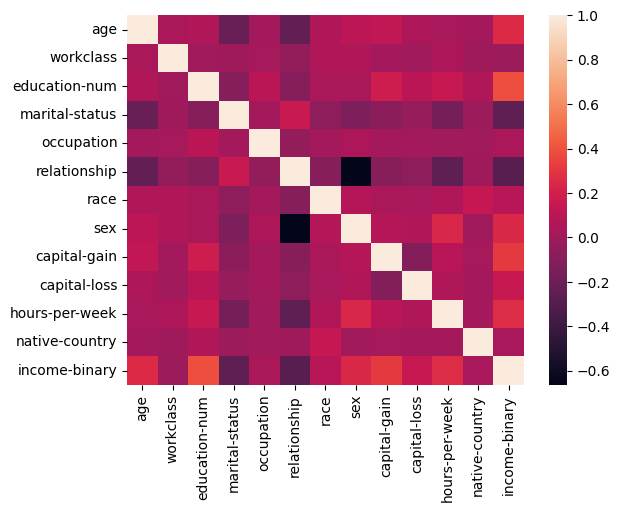

In [85]:
sns.heatmap(df.corr())

<Axes: >

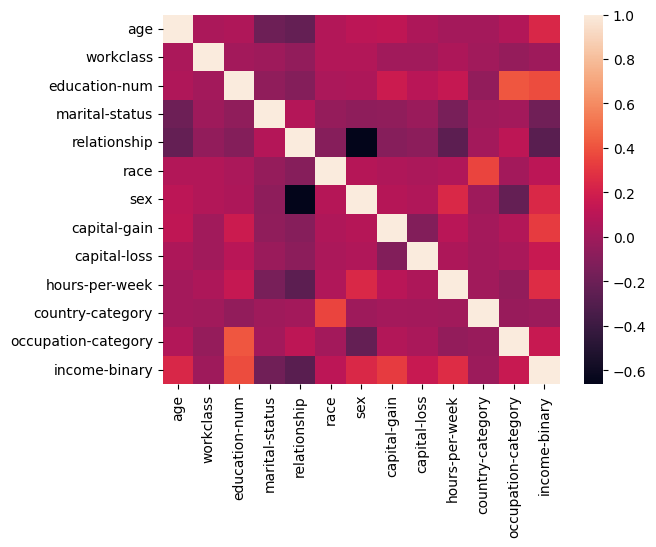

In [86]:
sns.heatmap(df_with_categories.corr())

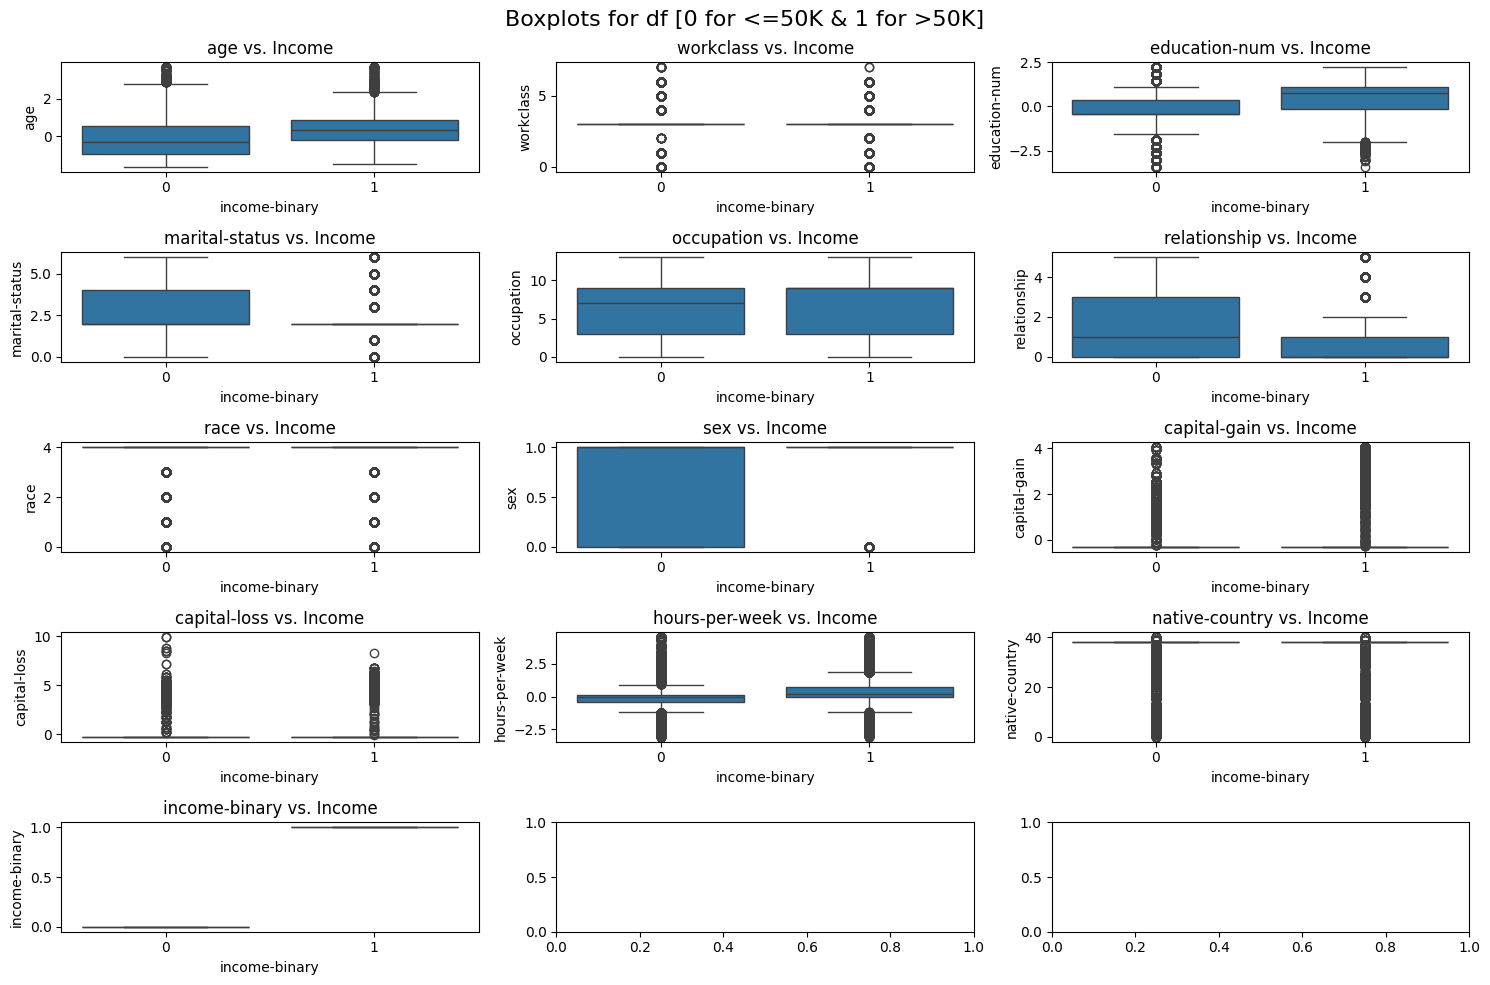

In [87]:
def create_boxplots(df, title):
  numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
  rows, cols = 5, 3  # Define the grid size (2 rows, 3 columns)

  fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Create the figure and subplots

  for i, feature in enumerate(numeric_features):
    row, col = divmod(i, cols)  # Calculate row and column indices for each subplot
    sns.boxplot(x='income-binary', y=feature, data=df, ax=axes[row, col])  # Create boxplot on each subplot
    axes[row, col].set_title(f'{feature} vs. Income')  # Set subplot title

  fig.suptitle(title, fontsize=16)  # Add a main title for the entire figure
  plt.tight_layout()
  plt.show()

# Create boxplots for df
create_boxplots(df, 'Boxplots for df [0 for <=50K & 1 for >50K]')

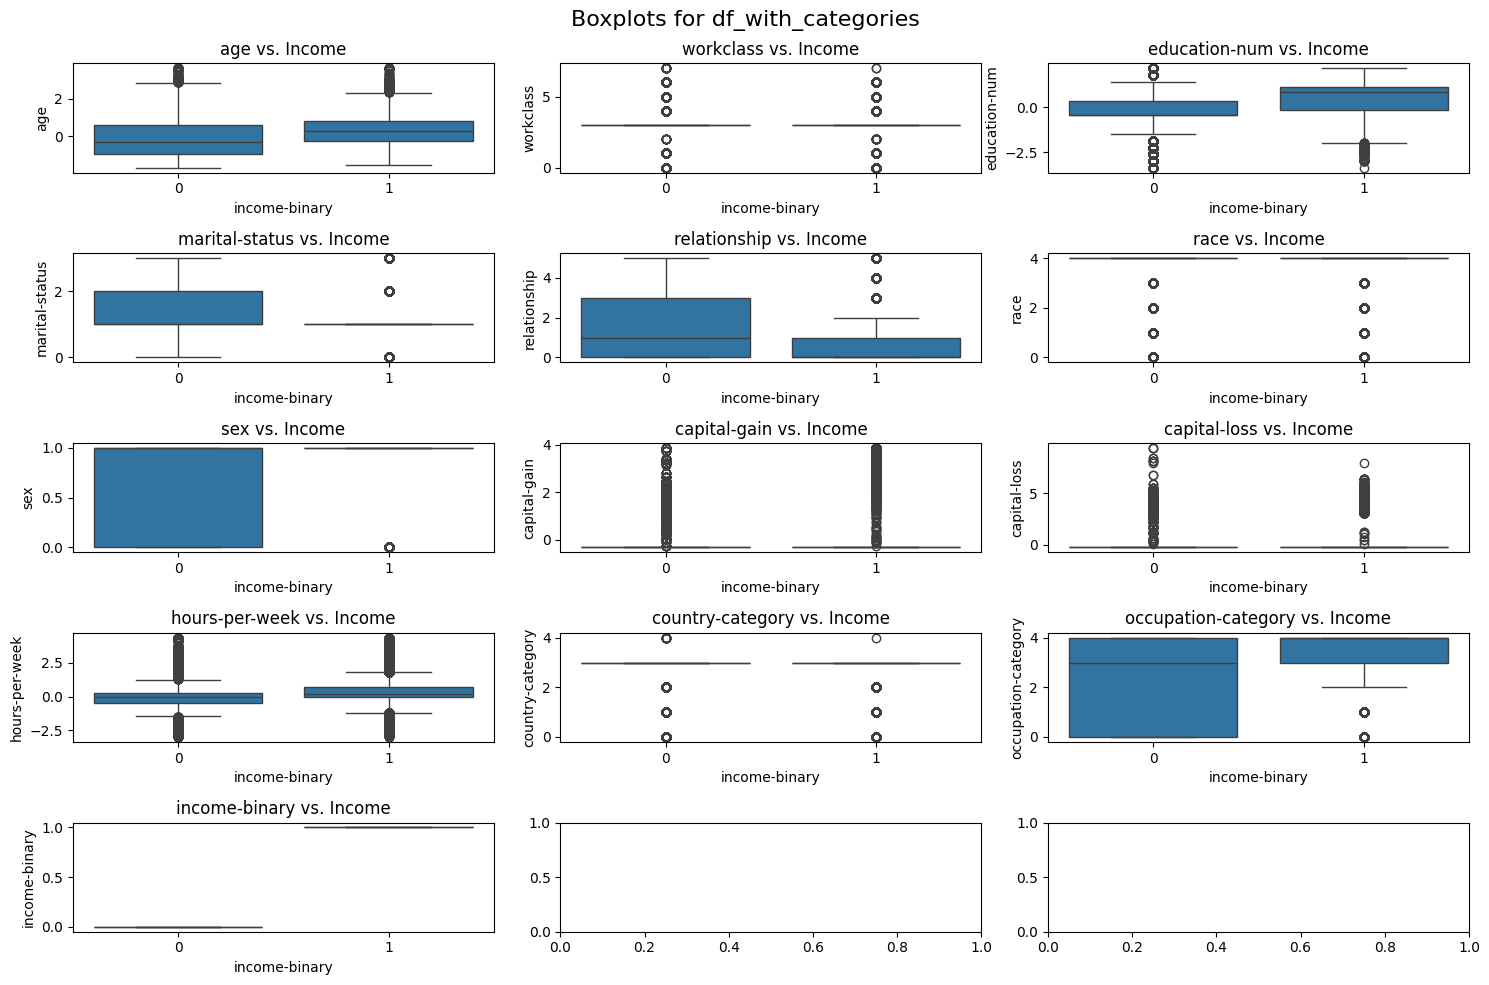

In [88]:
# Create boxplots for df_with_categories
create_boxplots(df_with_categories, 'Boxplots for df_with_categories')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63625 entries, 0 to 63675
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             63625 non-null  float64
 1   workclass       63625 non-null  int64  
 2   education-num   63625 non-null  float64
 3   marital-status  63625 non-null  int64  
 4   occupation      63625 non-null  int64  
 5   relationship    63625 non-null  int64  
 6   race            63625 non-null  int64  
 7   sex             63625 non-null  int64  
 8   capital-gain    63625 non-null  float64
 9   capital-loss    63625 non-null  float64
 10  hours-per-week  63625 non-null  float64
 11  native-country  63625 non-null  int64  
 12  income-binary   63625 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.8 MB


In [90]:
df.shape

(63625, 13)

In [91]:
df_with_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56952 entries, 0 to 56985
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  56952 non-null  float64
 1   workclass            56952 non-null  int64  
 2   education-num        56952 non-null  float64
 3   marital-status       56952 non-null  int64  
 4   relationship         56952 non-null  int64  
 5   race                 56952 non-null  int64  
 6   sex                  56952 non-null  int64  
 7   capital-gain         56952 non-null  float64
 8   capital-loss         56952 non-null  float64
 9   hours-per-week       56952 non-null  float64
 10  country-category     56952 non-null  int64  
 11  occupation-category  56952 non-null  int64  
 12  income-binary        56952 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.1 MB


In [92]:
df_with_categories.shape

(56952, 13)

### For DataFrame df:

In [93]:
# Step 1: Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['income-binary']), df['income-binary'], test_size=0.2, random_state=42)

# Step 2: Model Training
# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Random Forest Classification
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Naïve Bayes
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_classification_report = classification_report(y_test, nb_pred)

# Random Forest Classification
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)

# Step 4: Model Comparison
print("Naïve Bayes Model Accuracy:", nb_accuracy)
print("Naïve Bayes Classification Report:\n", nb_classification_report)

print("Random Forest Classification Model Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_classification_report)

Naïve Bayes Model Accuracy: 0.748762278978389
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.77      6404
           1       0.81      0.64      0.72      6321

    accuracy                           0.75     12725
   macro avg       0.76      0.75      0.75     12725
weighted avg       0.76      0.75      0.75     12725

Random Forest Classification Model Accuracy: 0.8787426326129666
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      6404
           1       0.87      0.88      0.88      6321

    accuracy                           0.88     12725
   macro avg       0.88      0.88      0.88     12725
weighted avg       0.88      0.88      0.88     12725



### For DataFrame df_with_categories:

In [94]:
# Repeat the same steps as above for DataFrame df_with_categories
# Step 1: Splitting the Dataset
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_with_categories.drop(columns=['income-binary']), df_with_categories['income-binary'], test_size=0.2, random_state=42)

# Step 2: Model Training
# Naïve Bayes
nb_model_cat = GaussianNB()
nb_model_cat.fit(X_train_cat, y_train_cat)

# Random Forest Classification
rf_model_cat = RandomForestClassifier(random_state=42)
rf_model_cat.fit(X_train_cat, y_train_cat)

# Step 3: Model Evaluation
# Naïve Bayes
nb_pred_cat = nb_model_cat.predict(X_test_cat)
nb_accuracy_cat = accuracy_score(y_test_cat, nb_pred_cat)
nb_classification_report_cat = classification_report(y_test_cat, nb_pred_cat)

# Random Forest Classification
rf_pred_cat = rf_model_cat.predict(X_test_cat)
rf_accuracy_cat = accuracy_score(y_test_cat, rf_pred_cat)
rf_classification_report_cat = classification_report(y_test_cat, rf_pred_cat)

# Step 4: Model Comparison
print("Naïve Bayes Model Accuracy (with categories):", nb_accuracy_cat)
print("Naïve Bayes Classification Report (with categories):\n", nb_classification_report_cat)

print("Random Forest Classification Model Accuracy (with categories):", rf_accuracy_cat)
print("Random Forest Classification Report (with categories):\n", rf_classification_report_cat)

Naïve Bayes Model Accuracy (with categories): 0.7494513212185059
Naïve Bayes Classification Report (with categories):
               precision    recall  f1-score   support

           0       0.70      0.86      0.77      5653
           1       0.83      0.64      0.72      5738

    accuracy                           0.75     11391
   macro avg       0.76      0.75      0.75     11391
weighted avg       0.76      0.75      0.75     11391

Random Forest Classification Model Accuracy (with categories): 0.8639276621894478
Random Forest Classification Report (with categories):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5653
           1       0.87      0.86      0.86      5738

    accuracy                           0.86     11391
   macro avg       0.86      0.86      0.86     11391
weighted avg       0.86      0.86      0.86     11391

